In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_pickle('data_loading_and_Preprocessing.pkl')

In [3]:
data

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

### EDA

In [4]:
# univariate analysis

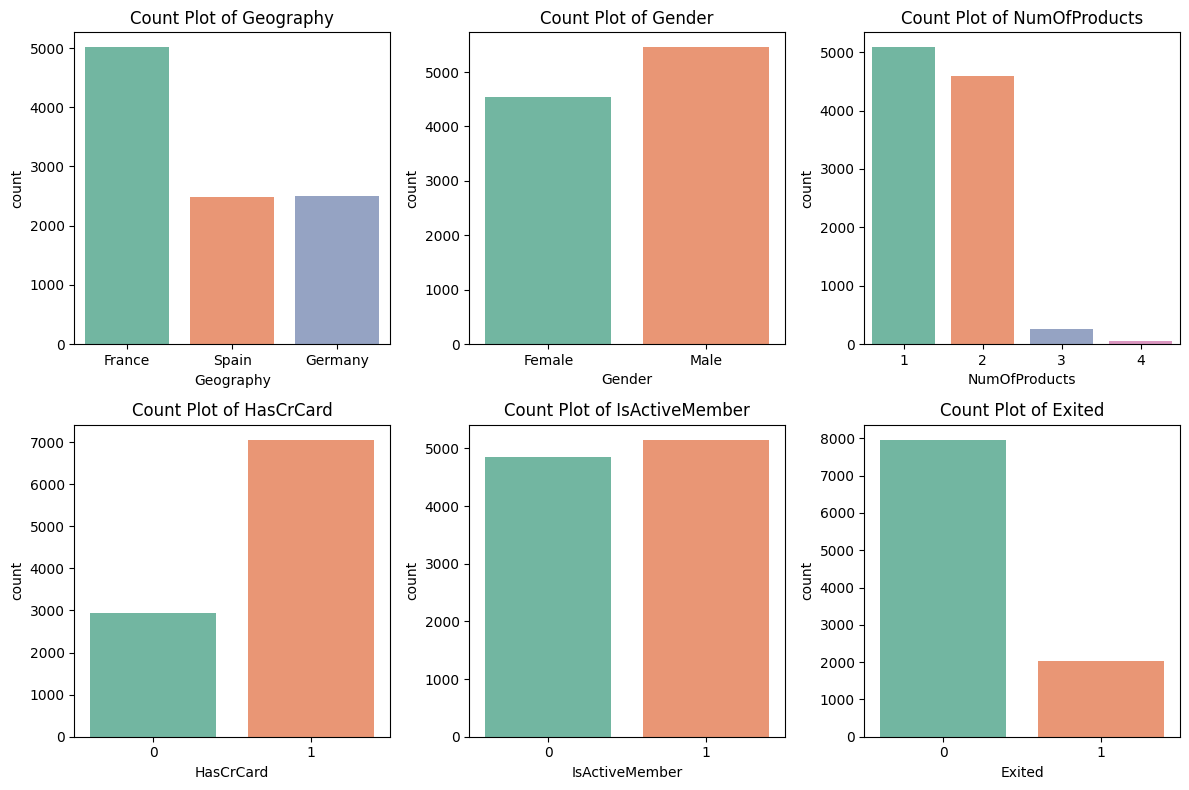

In [5]:
categorical_cols = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  
    sns.countplot(data=data, x=col, palette="Set2")
    plt.title(f"Count Plot of {col}")
     

plt.tight_layout()
plt.show()

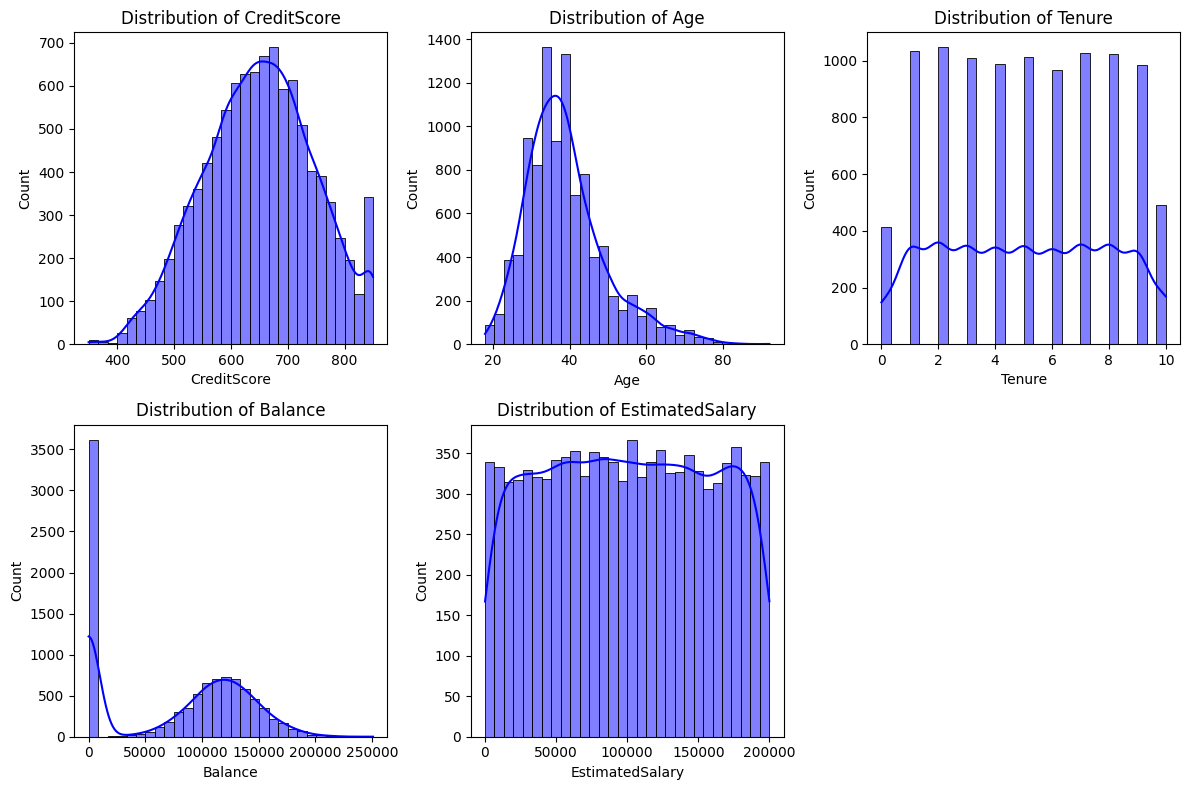

In [6]:
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]


plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=30, kde=True, color="blue")  
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x=col, color="red")  
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [7]:
# Bivariate analysis

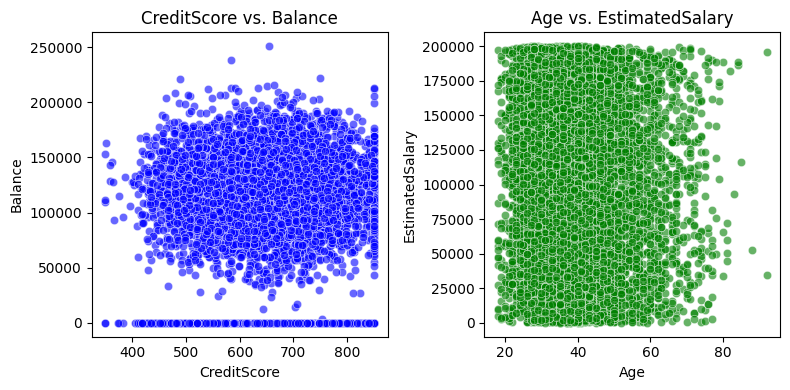

In [8]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x="CreditScore", y="Balance", alpha=0.6, color="blue")
plt.title("CreditScore vs. Balance")

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x="Age", y="EstimatedSalary", alpha=0.6, color="green")
plt.title("Age vs. EstimatedSalary")

plt.tight_layout()
plt.show()

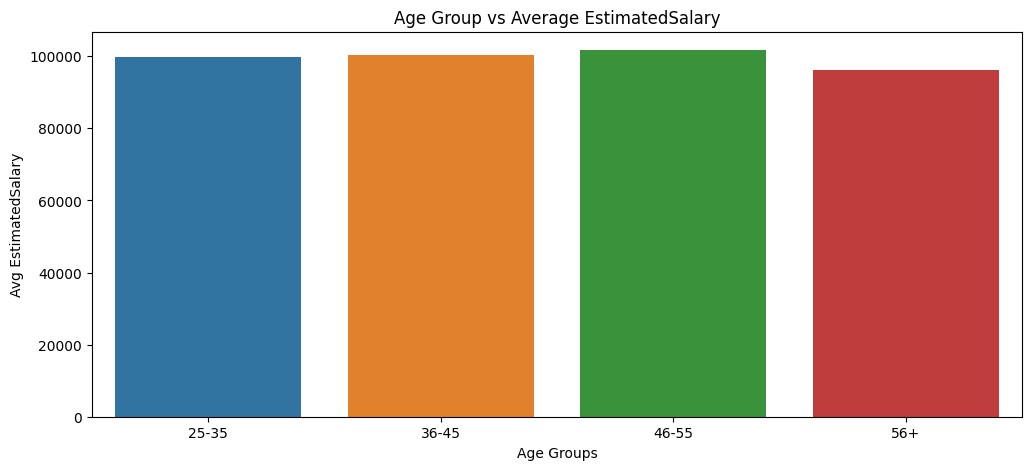

In [9]:
age_group_data = data.groupby(
    pd.cut(
        data['Age'],
        bins=[24, 35, 45, 55, float('inf')],
        labels=['25-35', '36-45', '46-55', '56+']
    )
)['EstimatedSalary'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(x='Age', y='EstimatedSalary', data=age_group_data)
plt.title('Age Group vs Average EstimatedSalary')
plt.xlabel('Age Groups')
plt.ylabel('Avg EstimatedSalary')
plt.show()


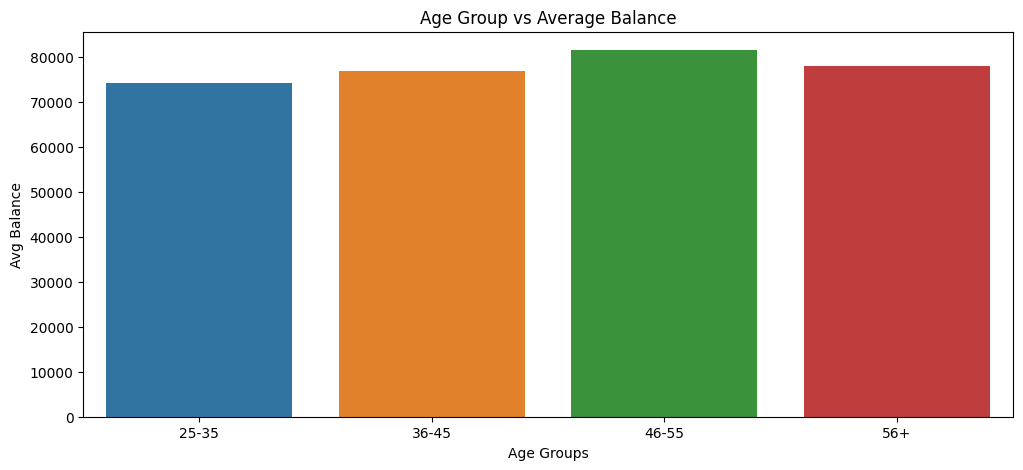

In [10]:
age_group_data = data.groupby(
    pd.cut(
        data['Age'],
        bins=[24, 35, 45, 55, float('inf')],
        labels=['25-35', '36-45', '46-55', '56+']
    )
)['Balance'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(x='Age', y='Balance', data=age_group_data)
plt.title('Age Group vs Average Balance')
plt.xlabel('Age Groups')
plt.ylabel('Avg Balance')
plt.show()


In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=data, x="Gender", y="Tenure", palette="coolwarm")
plt.title("Gender vs. Tenure")

plt.subplot(2, 2, 2)
sns.countplot(data=data, x="Gender", hue="IsActiveMember", palette="Set2")
plt.title("Gender vs. IsActiveMember")

plt.subplot(2, 2, 3)
sns.barplot(data=data, x="Gender", y="EstimatedSalary", estimator=lambda x: x.mean(), palette="viridis")
plt.title("Gender vs. Average Estimated Salary")

plt.tight_layout()
plt.show()

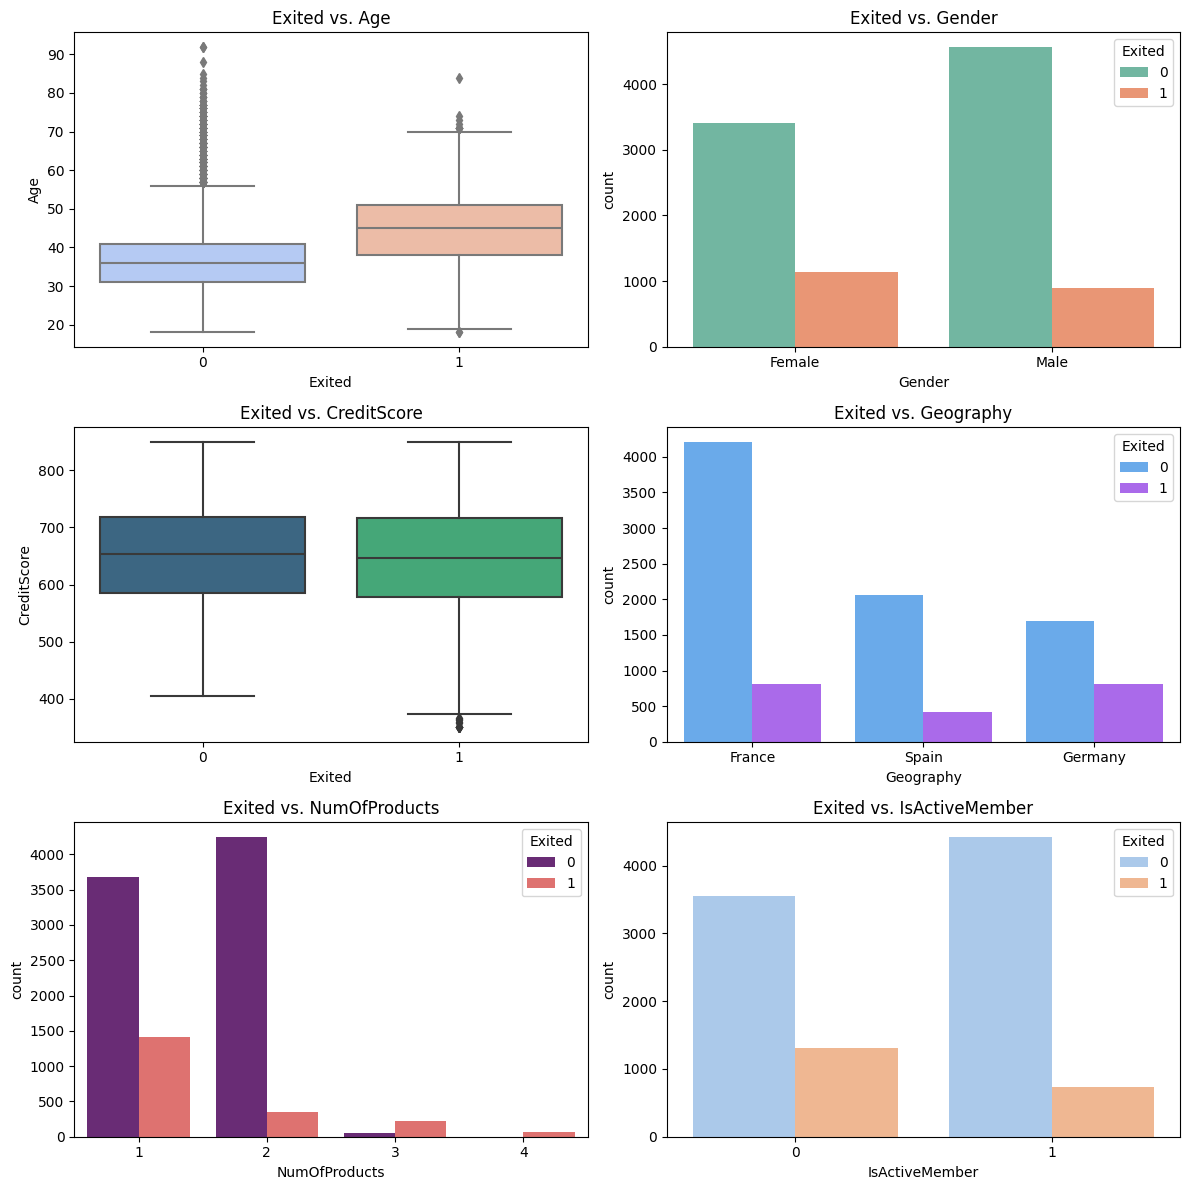

In [12]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
sns.boxplot(data=data, x="Exited", y="Age", palette="coolwarm")
plt.title("Exited vs. Age")

plt.subplot(3, 2, 2)
sns.countplot(data=data, x="Gender", hue="Exited", palette="Set2")
plt.title("Exited vs. Gender")

plt.subplot(3, 2, 3)
sns.boxplot(data=data, x="Exited", y="CreditScore", palette="viridis")
plt.title("Exited vs. CreditScore")

plt.subplot(3, 2, 4)
sns.countplot(data=data, x="Geography", hue="Exited", palette="cool")
plt.title("Exited vs. Geography")

plt.subplot(3, 2, 5)
sns.countplot(data=data, x="NumOfProducts", hue="Exited", palette="magma")
plt.title("Exited vs. NumOfProducts")

plt.subplot(3, 2, 6)
sns.countplot(data=data, x="IsActiveMember", hue="Exited", palette="pastel")
plt.title("Exited vs. IsActiveMember")

plt.tight_layout()
plt.show()

In [13]:
# correlation 

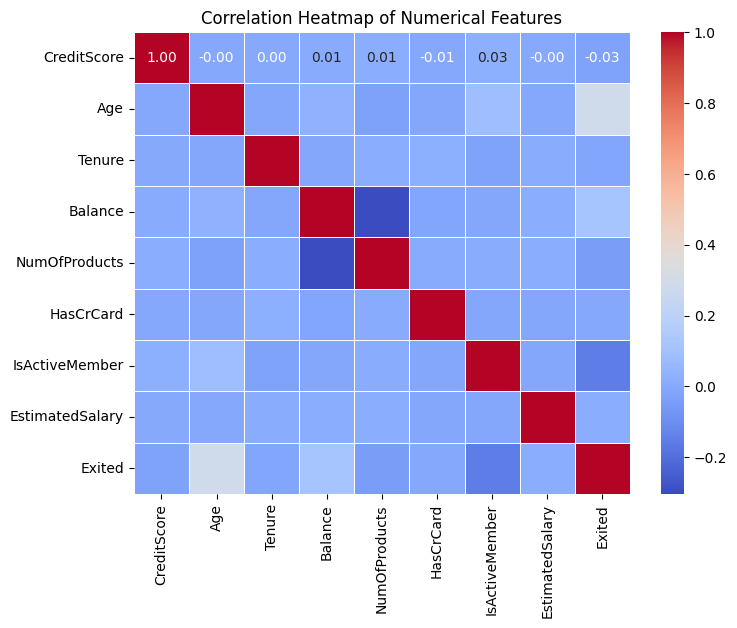

In [14]:
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard",	"IsActiveMember", "EstimatedSalary", "Exited"]
corr_matrix = data[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [15]:
data.to_pickle('data_exploratory_analaysis.pkl')